## VISUALISING DISTRIBUTIONS TO FIND PATTERNS WITHIN A DATASET

Let's say you are having a get together with your friends, and you are responsible for bringing in the wine. You turn to a vendor and he suggest a set of wine variety which varies in taste and flavour. You now want to see if this mix of wines is fit for your party. 
How do you do it?

Trying out samples of all categories would be too much for you. So, you decide to ask the bartender for an analysis of the wines, so you can maybe taste the extremes cases to see if they would work. 

The bartender has given you a sheet with details. How do you now figure out what the extremes are? 
You need to do some analyses, but too many numbers will only confuse you. You realise it is easier to see stuff happening, to visualise your samples. You decided to take the help of seaborn.


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine_data = pd.read_csv('datasets/winequality-white.csv', 
                        names=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
                                "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density", 
                                "pH", "Sulphates", "Alcohol", "Quality"],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')

Let's begin with figuring out how much alcohol is present across the wine samples. We have to look at how the content of alcohol varies across samples.

### For distributions which vary randomnly with respect to one variable - Univariate Distribution
Plot univariate distribution of elements of a single column using distplot function. <br>
It draws a histogram and fits a kernel density estimate

*The kernel density estimate is a non-parametric way to estimate the probability density function of a random variable. To draw this curve, each observation is replaced with a Gaussian curve centred at that value. Then all such curves are summed, the value of density at each point is computed and the resulting curve is normalized.*

*A histogram is a diagram consisting of rectangles whose area is proportional to the frequency of a variable and whose width is equal to the class interval.*

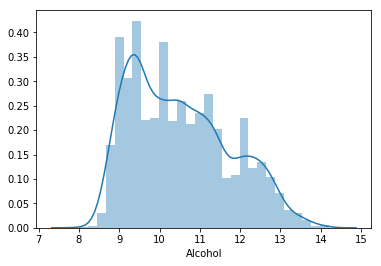

In [3]:
sns.distplot(wine_data['Alcohol'])

*We want to see how the alcohol content varies across our samples, we can get it from studying the histogram.*
#### To get just a histogram from the above graph, let us remove the Kernel density estimation curve

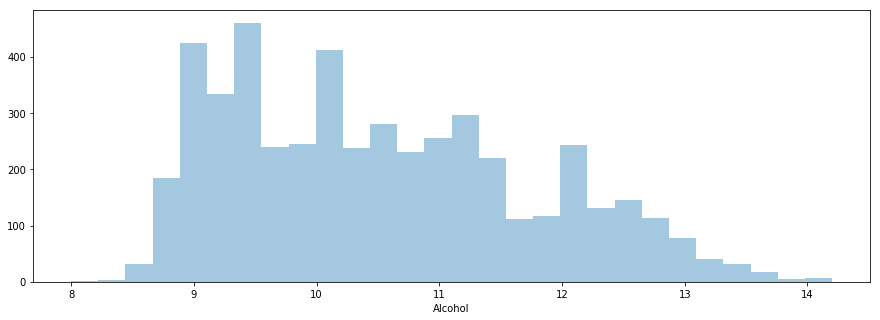

In [4]:
#Let us set up the figure so the plot is clearly visible
#The parameters inside the figsize denote the lengths of the box alloted for the plot
f, ax = plt.subplots(figsize=(15,5))

sns.distplot(wine_data['Alcohol'], kde=False);

*From the graph, we see that most of our wine samples have between 9 and 11 percent alcohol content*

#### Plotting each datapoint as a stick - Rugplot

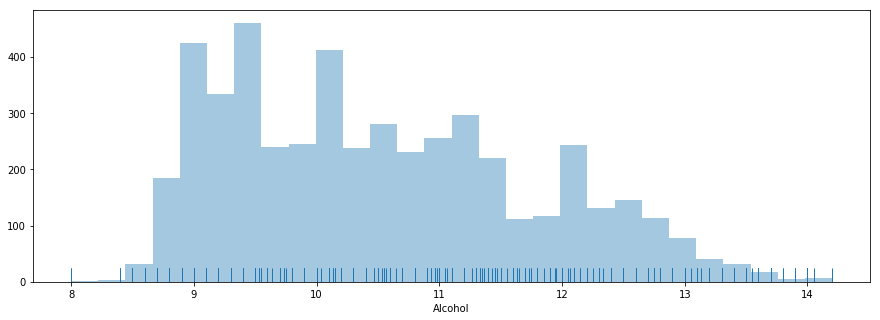

In [5]:
f,ax=plt.subplots(figsize=(15,5))

sns.distplot(wine_data['Alcohol'], kde=False, rug=True);

To separately create a rugplot using rugplot function itself,

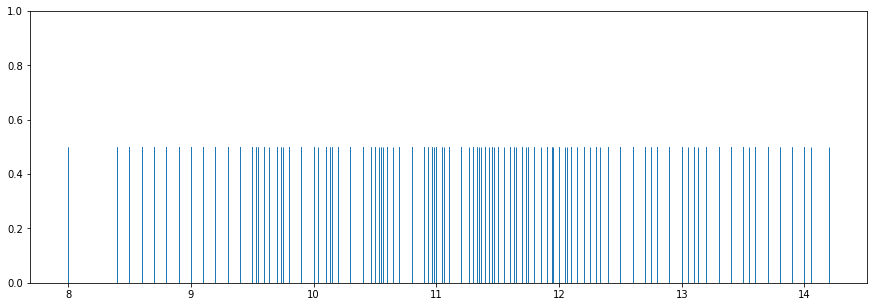

In [6]:
f,ax=plt.subplots(figsize=(15,5))

sns.rugplot(wine_data['Alcohol'], height=0.5, axis='x')

*From the above, we know that there is a lot of variation in the wine samples, with respect to alcohol content. Between 11 percent and 12 percent content, there are very minute variation levels of alcohol content available in the given samples*

#### Playing around with the histogram for better analysis 
What if we want to minutely observe the number of wine samples with a certain alcohol content? How do we do this?

Vary the number of bins in the histogram. The more you increase the number, the smaller is the width of each bin, and the more you know about individual data points.
If not specified, Seaborn chooses the number of bins based on the Freedman-Diaconis rule.

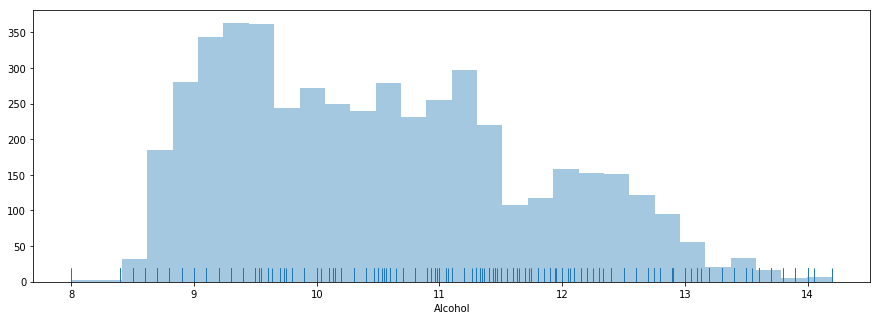

In [7]:
f,ax=plt.subplots(figsize=(15,5))

sns.distplot(wine_data['Alcohol'], bins=30, kde=False, rug=True);

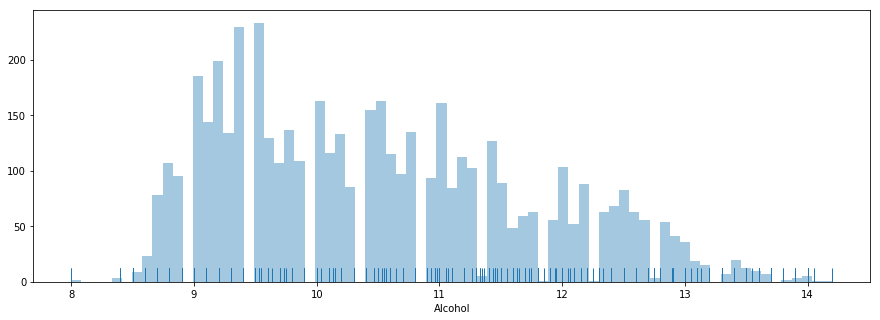

In [8]:
f,ax=plt.subplots(figsize=(15,5))

sns.distplot(wine_data['Alcohol'], bins=75, kde=False, rug=True);

By increasing the number of bins, we realise that if you want a wine sample with an alcohol content of 9.9, we will not find it in the current sample mix. But, we can get 9.8 and 10.1.

#### To get just the kernel density estimation, which gives the shape of the distribution
This gives us the trend of alcohol levels in the wine samples available. 

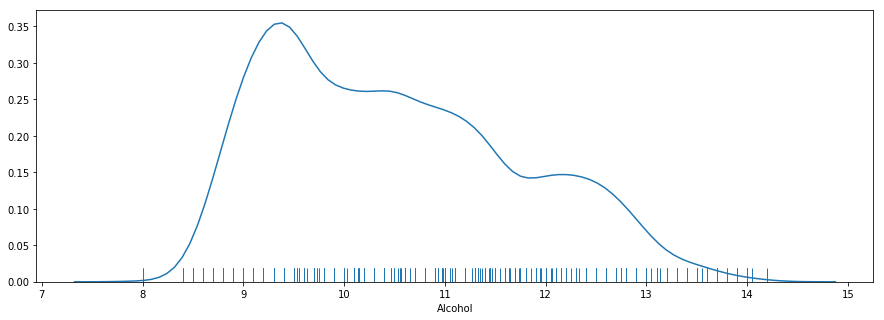

In [9]:
f,ax=plt.subplots(figsize=(15,5))

sns.distplot(wine_data['Alcohol'], hist=False, rug=True);

Generating the same with the kernel deploy function directly,

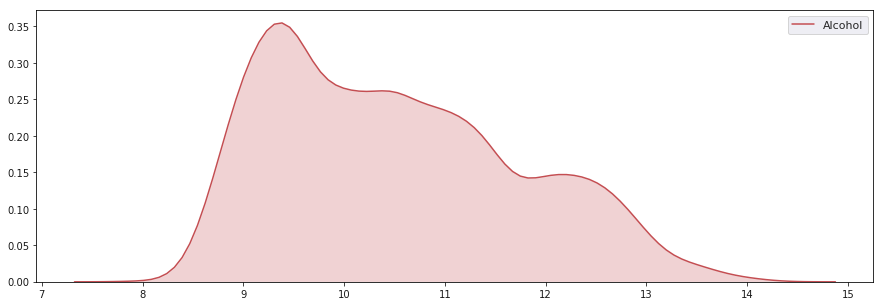

In [10]:
f,ax=plt.subplots(figsize=(15,5))

sns.set(color_codes=True)
sns.kdeplot(wine_data['Alcohol'],shade=True, color="r")

*Note: Setting the parameter shade as true has highlighted the area under the kernel estimate curve. We used the color "r" that stands for red according to the default color code set by the tool. It is because of this that we first set the color_codes as true*

We know that the curve drawn from the points in a graph depends on 
* the accuracy of the points in the plot
* the number of data points chosen

Let us verify the same by plotting curves with different bandwidths controls

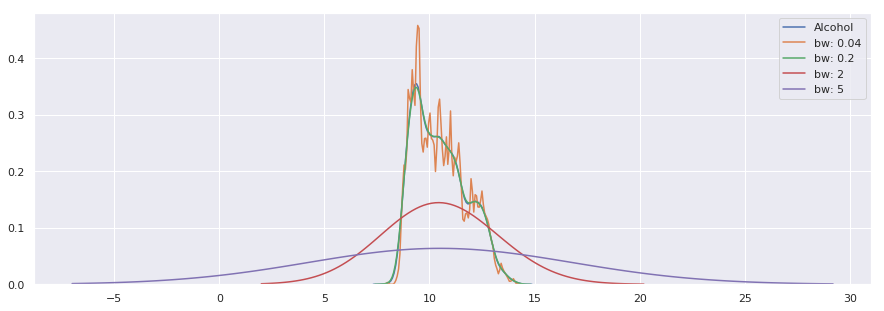

In [11]:
f,ax=plt.subplots(figsize=(15,5))


sns.kdeplot(wine_data['Alcohol'])
sns.kdeplot(wine_data['Alcohol'], bw=.04, label="bw: 0.04")
sns.kdeplot(wine_data['Alcohol'], bw=.2, label="bw: 0.2")
sns.kdeplot(wine_data['Alcohol'], bw=2, label="bw: 2")
sns.kdeplot(wine_data['Alcohol'], bw=5, label="bw: 5")

We can make a few observations from the obtained plot.
* Smaller the bandwidth parameter, more accurate is the curve. But too small a bandwidth unnecessarily crowds the    datapoints
* When explicitly not specified, the tool automatically choses the bandwidth it thinks best describes the distribution, which, more often than not, turns out pretty close.
* While estimating to draw the curve, the path traces points that are beyond the range of the dataset.
* The bw parameter controls how tightly the estimation is fit to the data.

The plot provides optional parameters to fit the curve within the dataset, within two given limits, plot the dense points vertically and so on.

While trying to learn about the alcohol content, we learnt some interesting ways to observe trends in a given variable. Can we try the same with 2 variables?
We have two columns in our dataset, with free sulfur diode and total sulfur dioxide. Let us try to observe the relation between the contents of these in our wine samples. These being preservatives, you could know how long after the party you can keep your wine;)

## For distributions which vary randomly in two variables : BIVARIATE DISTRIBUTIONS

Let us study how the Free Sulfur Dioxide content affects the Total Sulfur Dioxide content in our wine samples.

#### We need to plot two variables in a single graph; we can use the jointplot() function.

In [12]:
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data))

SyntaxError: invalid syntax (<ipython-input-12-2acea12093c0>, line 1)

The distribution of dioxide across the wine samples is a scatter plot with points depicted on the corresponding x-y positions. 

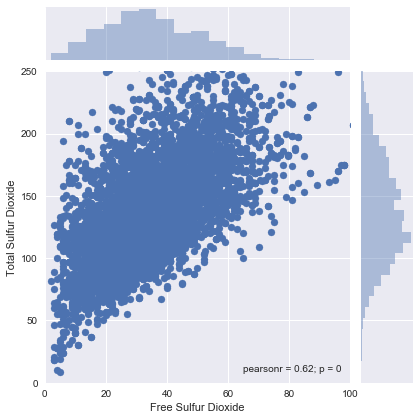

In [58]:
#Adding a x and y limit to the plot to see the scatter plot better
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data,
              xlim={0,100}, ylim={0,250})

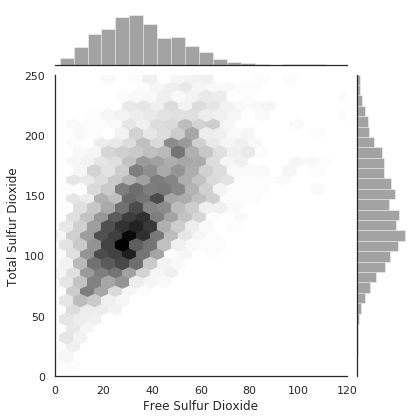

In [13]:
#Adding a hex type to the plot
with sns.axes_style('white'):
    sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
                  kind='hex',color='k',
                  xlim={0,120}, ylim={0,250})

The above is called a Hexbin plot, or in other words, the bivariate analogue of a histogram. The color 'white' is used to specify background colour, as hexbin plots look best in this contrast mode.

We see the histograms of the individual plots on the right side and top side of the plot. Observing from that, the cross section where the peaks of the two histograms are present are the darkest regions of our hexbin plot. 
Many samples have a free sulfur dioxide content of about 34-40, and correspondingly, the total sulfur dioxide content is in the range of around 120.


#### How about Kernel density estimation for bivariate distributions? What happens to the curve?


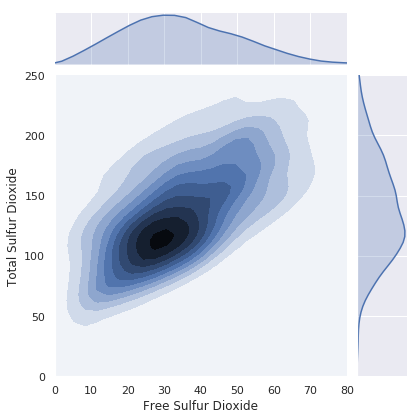

In [14]:
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
              kind="kde",
              xlim={0,80}, ylim={0,250})

The above graph shows the sulfur dioxide quantity distribution across the various wine samples. It is evident that the total quantity follows the pattern of the free dioxide quantity.
The curves next to the main plot show where the quantity of dioxide peaks. Correspondingly, we see that the KDE curve is narrow where both the concentrations are maximum.

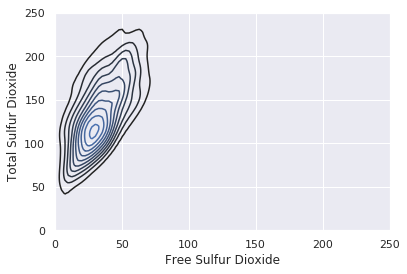

In [15]:
# The clip parameters clips the plot to the specified limits
sns.kdeplot(wine_data['Free Sulfur Dioxide'], wine_data['Total Sulfur Dioxide'], clip=(0,250))

As expected, the graph is exactly the same as the previous, with just the outlines highlighted. These are the kernel density estimation curves. The color gradient differentiates the peaks of both the concentrations.

We see that the graph occupies a very small area in our entire graph window. Let us now reduce the size of the complete graph.
For this, we call the matplotlib function and set x and y limits for our plot, and then replot the curves. 

(0, 250)

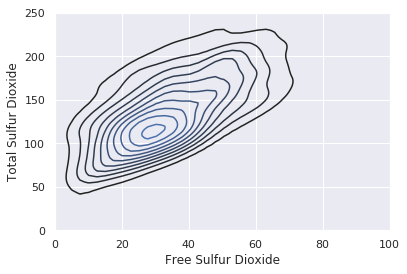

In [16]:
sns.kdeplot(wine_data['Free Sulfur Dioxide'], wine_data['Total Sulfur Dioxide'], clip=(0,250))

#Setting limits to the x and y axes
plt.xlim(0,100)
plt.ylim(0,250)

(-50, 400)

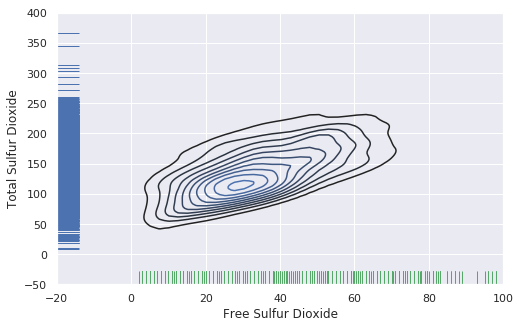

In [17]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(8,5))

sns.kdeplot(wine_data['Free Sulfur Dioxide'],wine_data['Total Sulfur Dioxide'], clip=(0,250))


#adding rug plots to the above
#The vertical tag is used to plot the rug lines along x axis for Total Sulfur Dioxide
sns.rugplot(wine_data['Free Sulfur Dioxide'], color="g", height=0.05)
sns.rugplot(wine_data['Total Sulfur Dioxide'], vertical=True, height=0.05);

#Setting limits to the x and y axes
plt.xlim(-20,100)
plt.ylim(-50,400)

*The green colour indicates higher concentration of free sulfur dioxide, as indicated in the rugplot command.*

##### Customise a little
* Increasing contour levels for closer lines
* Use a different colour pallete

(0, 250)

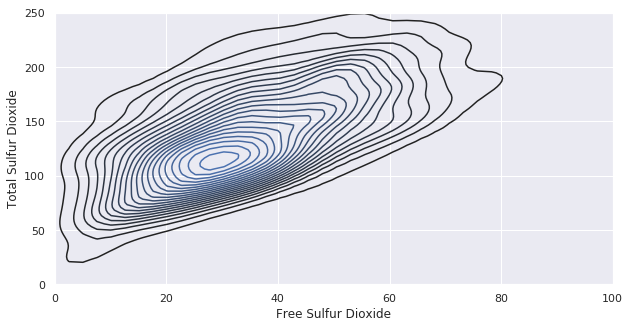

In [18]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(10,5))

sns.kdeplot(wine_data['Free Sulfur Dioxide'],wine_data['Total Sulfur Dioxide'],clip=(0,250), 
            n_levels=30);

plt.xlim(0,100)
plt.ylim(0,250)

#### We have seen the bivariate histogram as layers and as curves. What if we want to view it as a single continuous region with different colour gradients?

(0, 250)

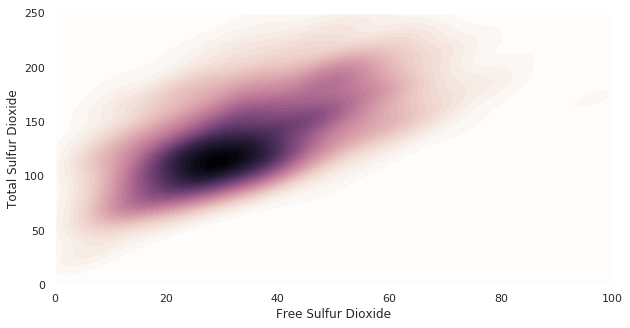

In [19]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(10,5))

cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)
sns.kdeplot(wine_data['Free Sulfur Dioxide'],wine_data['Total Sulfur Dioxide'],clip=(0,250), 
            cmap=cmap, n_levels=60, shade=True);
#The number of contour levels have been increased, and the cubehelix colour palette is used

plt.xlim(0,100)
plt.ylim(0,250)

The regions with high concentration (=1) are marked as dark, while those with lesser concentration are marked as light. We get a single graph where the distinction between curves is not evident.

**Note: You can use the jointgrid() function also (which is used by jointplot() to plot your graphs), to create further visual effects like adding markers, more layers, etc.**

Let's try to see what else we can find from the dataset. 

### PLOTTING PAIRWISE RELATIONSHIPS

Studying bivariate relationships between every two columns in a given dataset becomes a tedious job. Extending the idea of bivariate relationships, Seaborn provides a pairplot() function. 
This creates a matrix of axes and shows the relationship between every pair of columns in the dataframe.

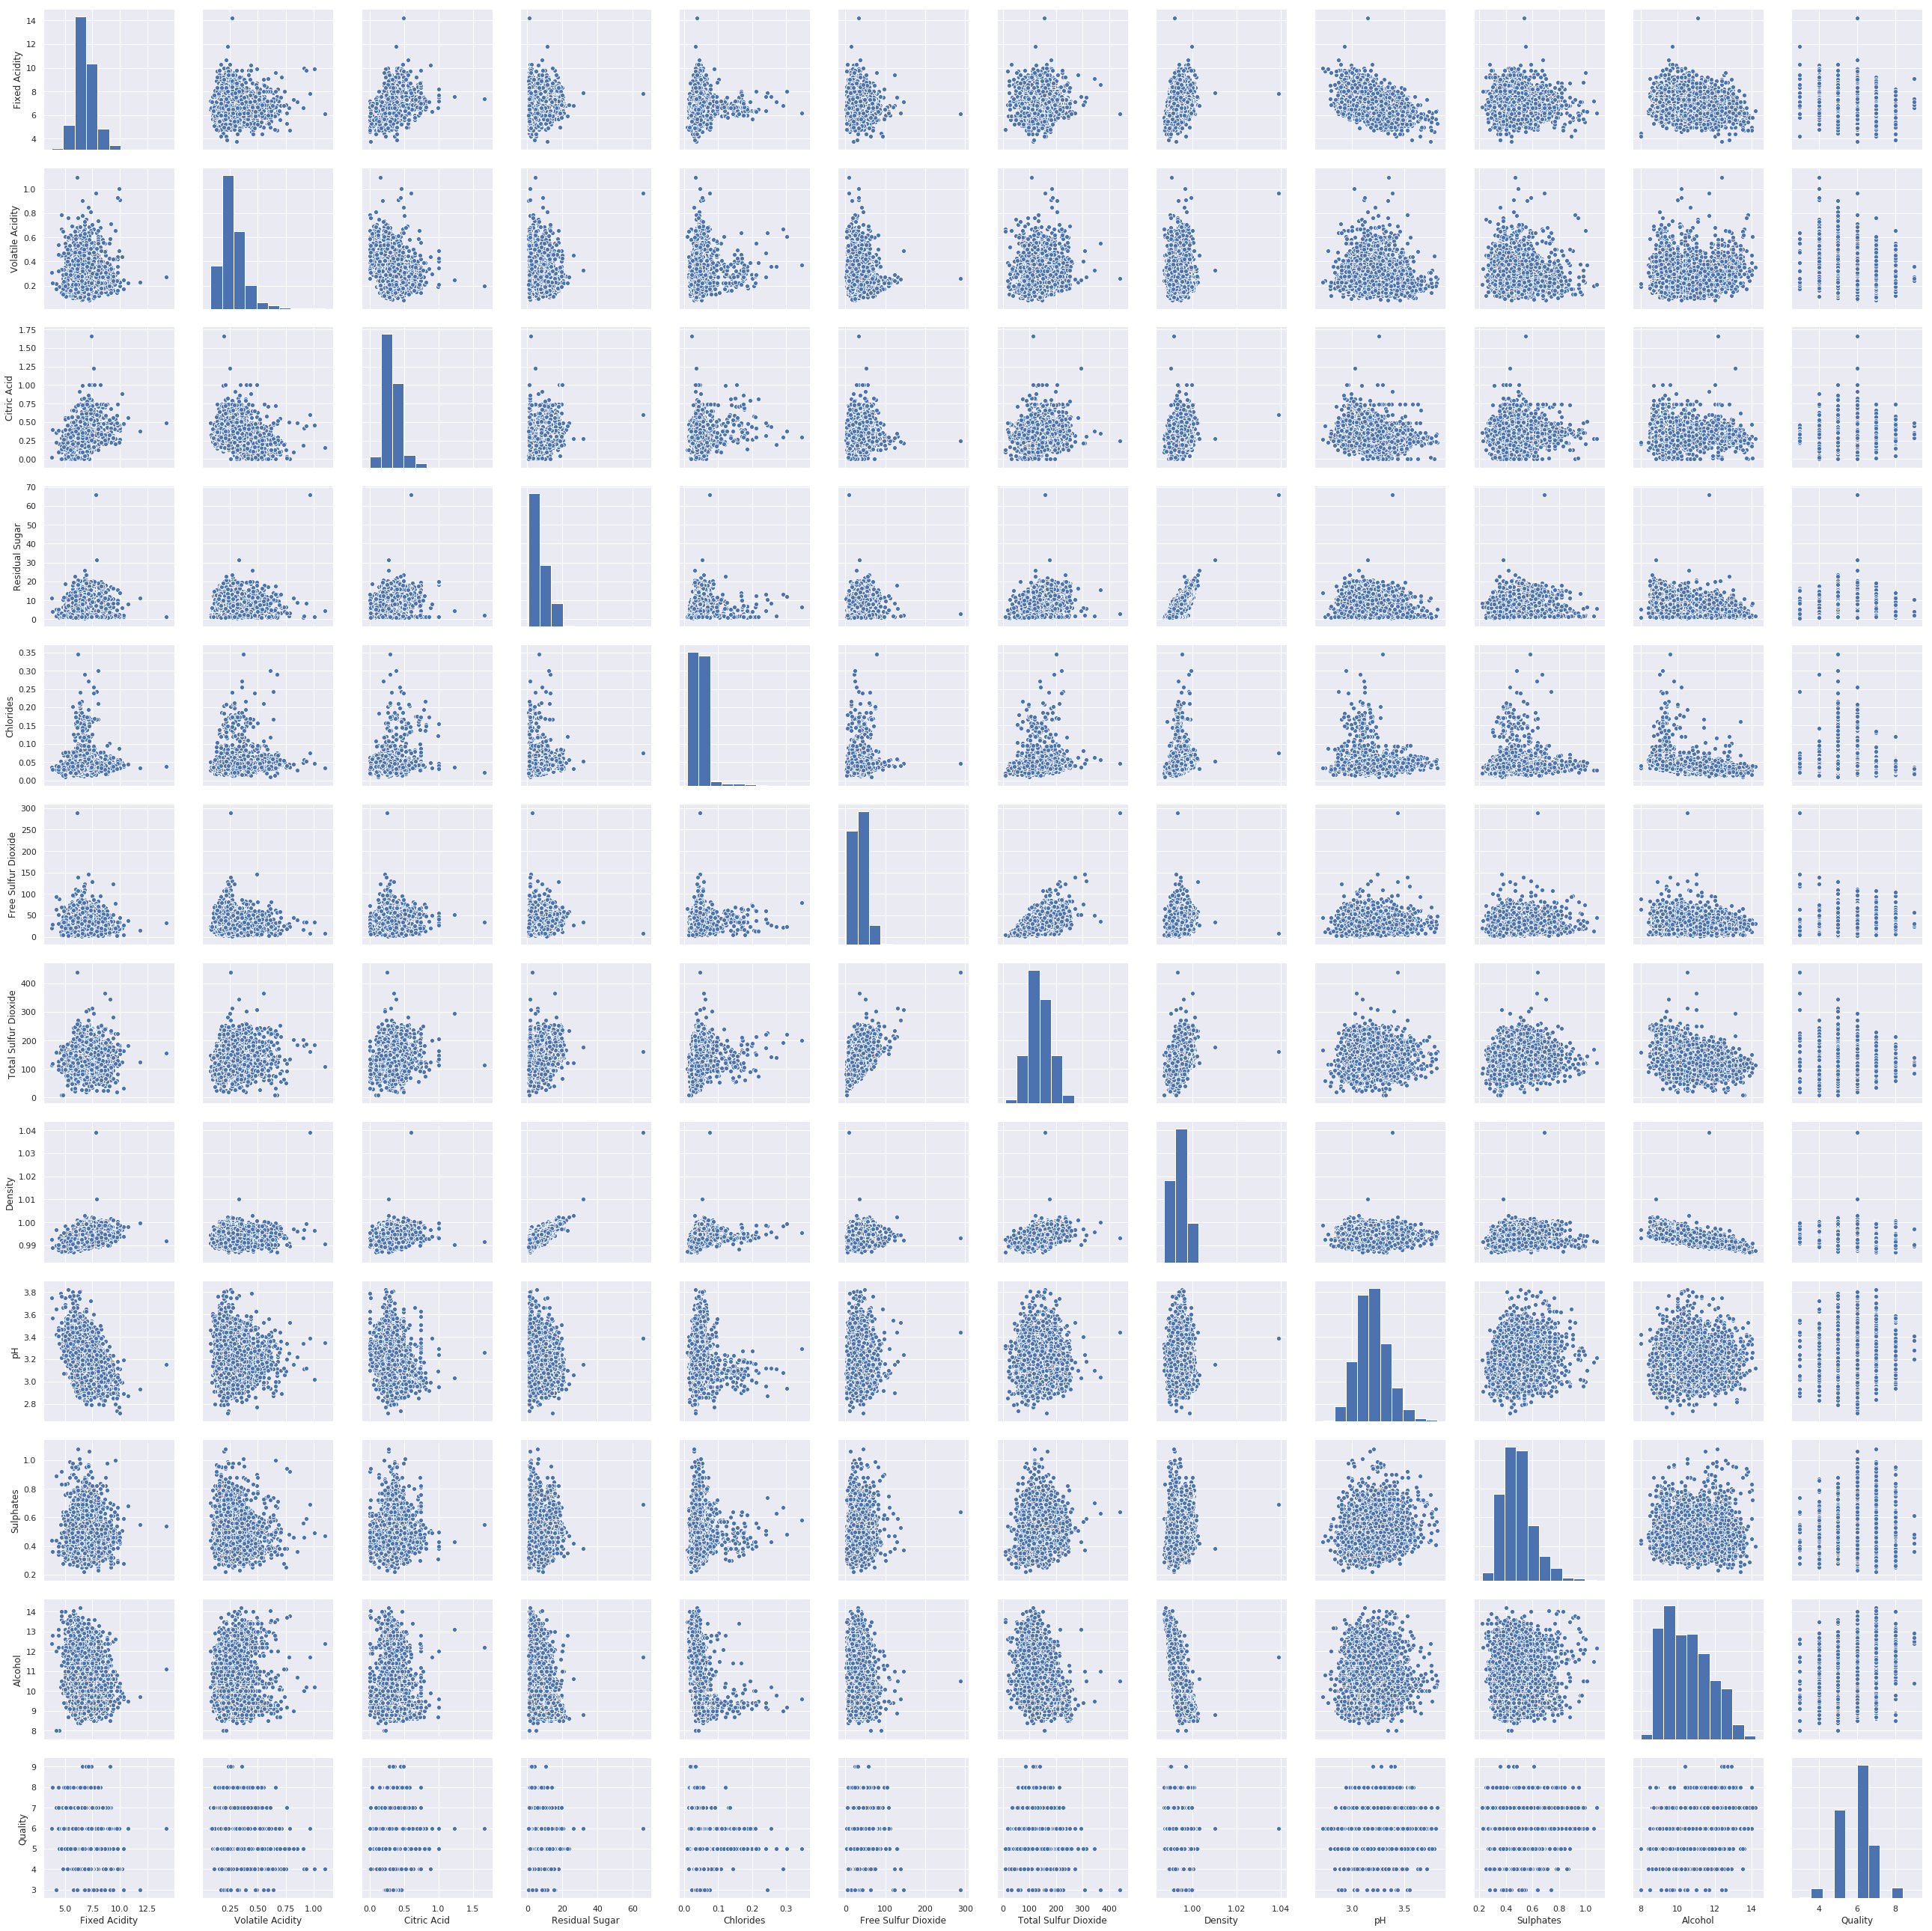

In [21]:
sns.pairplot(wine_data, height=3)

We see that:
* A matrix of graphs is created
* All the column titles are the rows and columns of the matrix
* The graphs in the principal diagonal are plots of the same quantity on both X and Y axes, indicating a univariate distribution. Thus, we see a histogram.
* Rest of the entries have different quantities along the X and Y axes, creating scatter plots of the bivariate distribution.


But this is a little complicated to understand. Let us break it down and analyse the aciditied of our wine samples.
### Let us just plot the relationship between Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar.

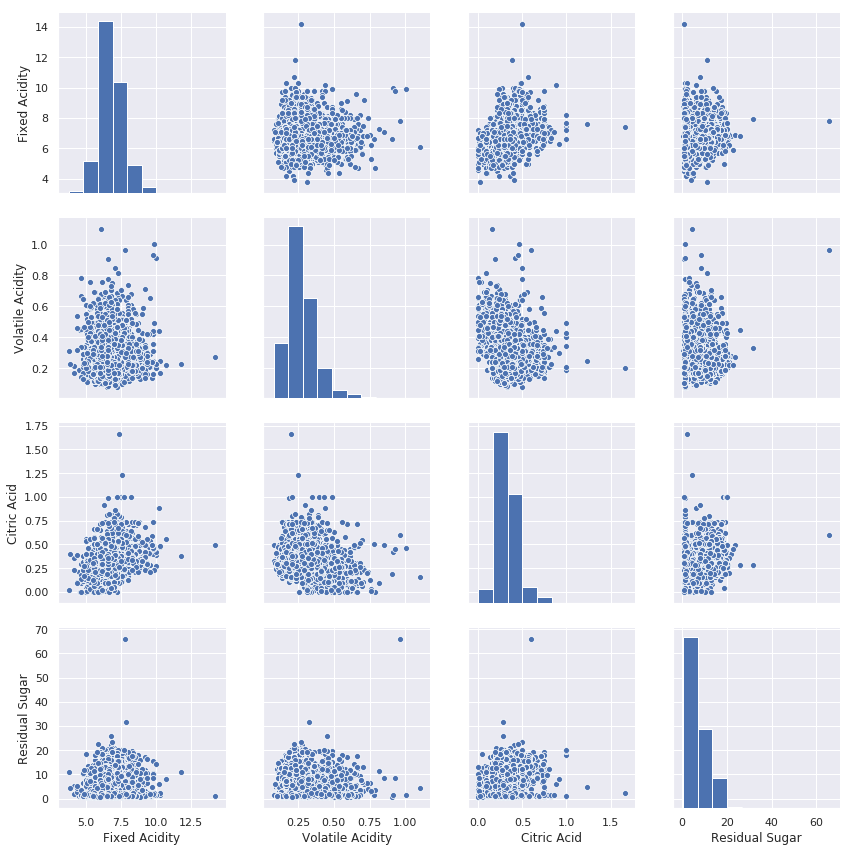

In [22]:
sns.pairplot(wine_data, height=3, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"])

### To plot the same graph as above but with KDE in the principle diagonal

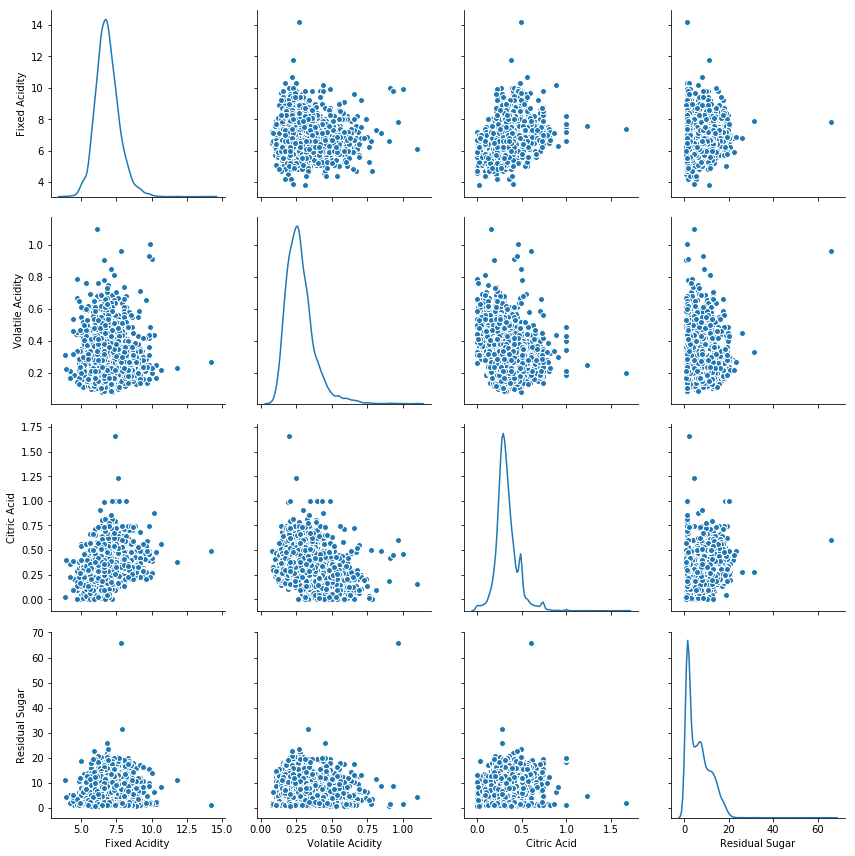

In [15]:
sns.pairplot(wine_data, size=3, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"],
             diag_kind="kde")

### Plotting regression plots on the off-diagonals

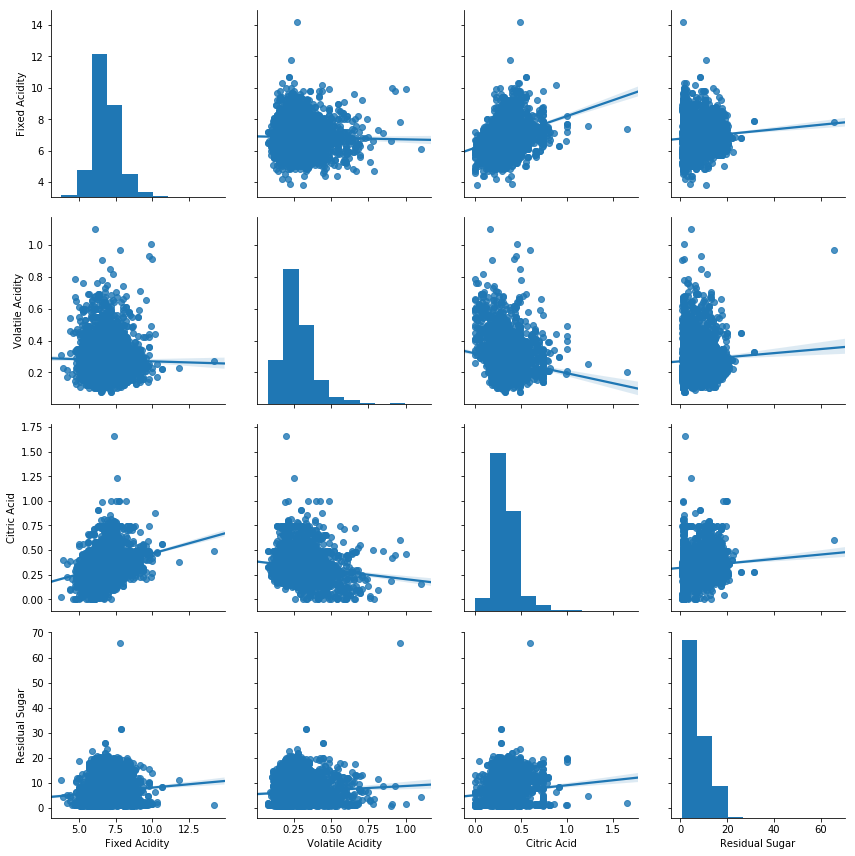

In [8]:
sns.pairplot(wine_data, size=3, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"],
             kind='reg')
#Making kind as reg (By default, it is scatter)

### Let us try to make the above plot interesting

We have the plots of different acidity parameters. Let us classify them based on the wine quality's pH content. We could then relate acidity to the pH factor of the wine sample.

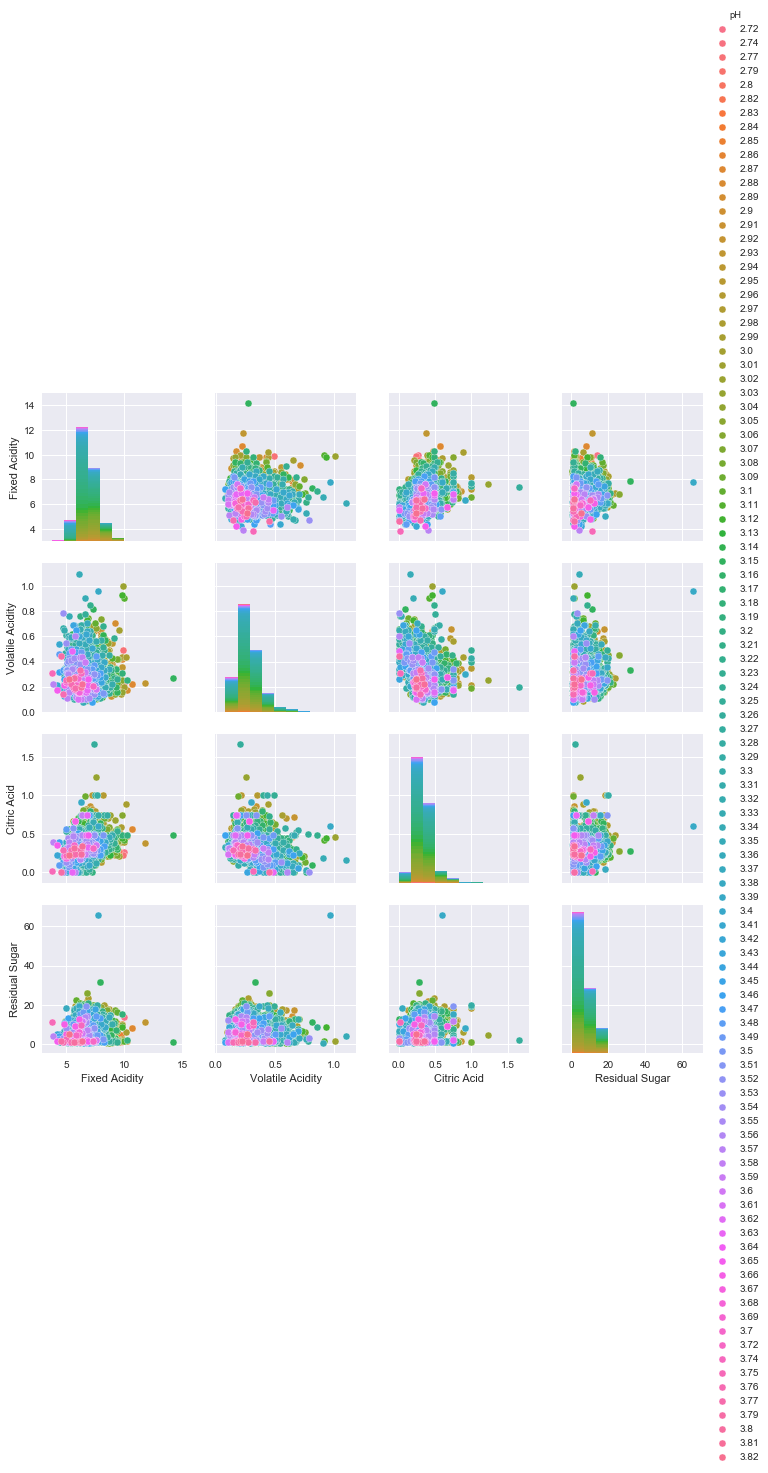

In [21]:
sns.pairplot(wine_data, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"],
             hue="pH")

*A general trend we can easily observe from the bright pink spots in the graphs is that pH is large when acidities are very low. Intuitively, this is in accordance with our logic - More the pH, more basic is the sample in question.*

**Food for thought: Can we plot a heatmap with Seaborn?**<br>
**Hint:** *Use the seaborn.heatmap() function. You may first need to find the correlation between variables using data.corr() and then pass it into the heatmap function.*

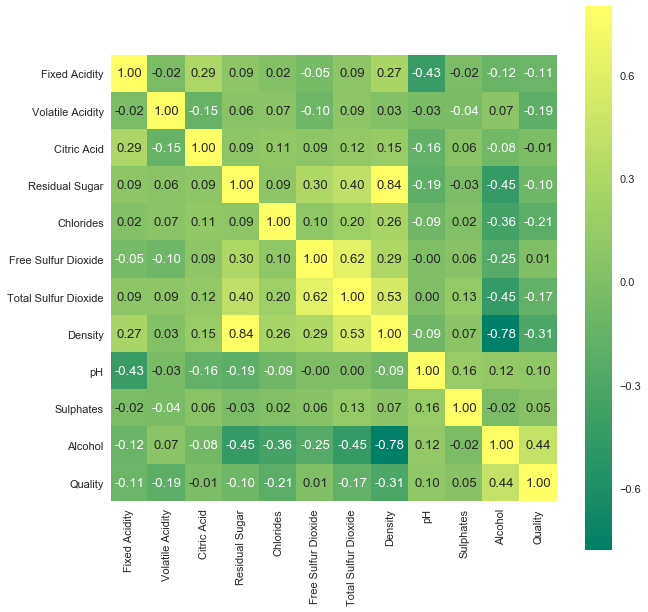

In [20]:
corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()